### Import packages

In [1]:
import sys
sys.path.append('../')
import numpy as np
from gmm_mi import GMM, GMM_MI
from utils.synthetic_data import D3p as dataset
from utils.plotting import plot_gmm_contours, histogram_estimates, plot_loss_curves

### Calculate the true MI of the synthetic model, and plot contours

0.08719243298747173


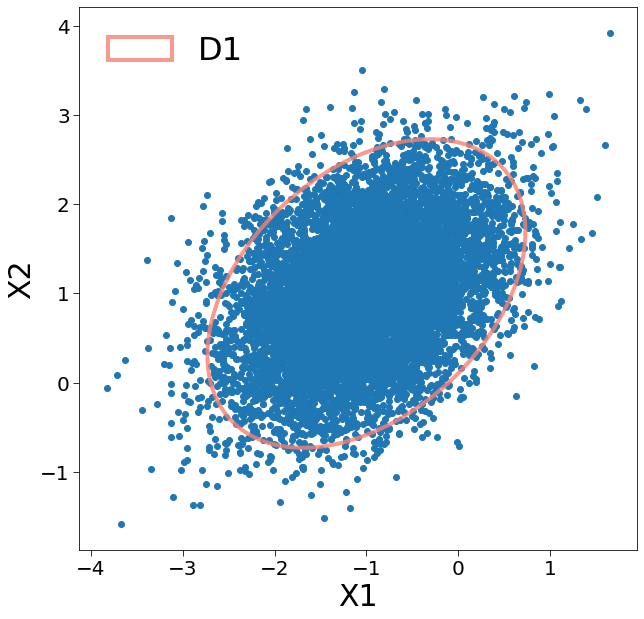

In [9]:
label = 'D1'
analytic = dataset.estimate_MI_MC(MC_samples=1e8)
print(analytic)
plot_gmm_contours(dataset, ls='-', label=label)

In [14]:
dataset.estimate_MI_quad()

0.08717669358072788

In [11]:
def calc_MI_analytical(covariances):
    # need to provide covariance matrix with shape [1, 2, 2] 
    return -0.5*np.log(1-(covariances[0, 0, 1] / (np.sqrt(covariances[0, 0, 0]*covariances[0, 1, 1])))**2) 

In [15]:
analytic = calc_MI_analytical(dataset.covariances_)
print(analytic)

0.0871766935723889


### Test on 500 trials

In [24]:
N = 10000
random_states = 500

# probably make a yaml file for these parameters
# parameters to play with
n_inits = 10
n_folds = 5
init_type = 'random_sklearn'
MC_samples = 1e5
tol = 1e-6
reg_covar = 1e-15
max_iter = 10000
MC_samples = 1e5
bootstrap = True
fixed_components = False
n_bootstrap = 100
select_c = 'bic'
patience = 1
all_MI_estimates = np.zeros((random_states))

for r in range(random_states):
    
    n_components = dataset.n_components 
    true_weights = dataset.weights_
    true_means = dataset.means_
    true_covariances = dataset.covariances_

    X = GMM(n_components=n_components, weights_init=true_weights, 
                      means_init=true_means, covariances_init=true_covariances, 
                      random_state=r).sample(N)[0]

    MI_mean, _, lc = GMM_MI(X, n_folds=n_folds, n_inits=n_inits, 
                            init_type=init_type, reg_covar=reg_covar, tol=tol, max_iter=max_iter,
                            bootstrap=bootstrap, n_bootstrap=n_bootstrap, MC_samples=MC_samples, 
                            fixed_components=fixed_components, fixed_components_number=n_components, 
                            select_c=select_c, patience=patience)
    

    # print for debugging purposes
    print(r, MI_mean) 

    all_MI_estimates[r] = MI_mean

    # save, if needed
    #np.save('./D3p_bias_MI_test.npy', all_MI_estimates)

1 -40809.99748793019
Convergence reached at 1 components
0 0.09083611259446381
1 -41191.60803296739
Convergence reached at 1 components
1 0.09219040357493491
1 -41359.43451185872
Convergence reached at 1 components
2 0.09441670835112582
1 -40998.404135555
Convergence reached at 1 components
3 0.07873602036025715
1 -40979.75680153451
Convergence reached at 1 components
4 0.08377973538213952
1 -41318.13042508992
Convergence reached at 1 components
5 0.08564250691622338
1 -40923.487061295935
Convergence reached at 1 components
6 0.09576311353870505
1 -40756.97659639441
Convergence reached at 1 components
7 0.08360708718957684
1 -41357.59533725725
Convergence reached at 1 components
8 0.0867809357379242
1 -41187.55430676794
Convergence reached at 1 components
9 0.088545877496781
1 -41127.15804971981
Convergence reached at 1 components
10 0.09327995262535108
1 -41093.636273452175
Convergence reached at 1 components
11 0.08739589830853635
1 -41045.08114997777
Convergence reached at 1 compone

102 0.09045411386054539
1 -41625.02522650407
Convergence reached at 1 components
103 0.08714526356292279
1 -41060.98524425021
Convergence reached at 1 components
104 0.09568505209823551
1 -40923.259631979825
Convergence reached at 1 components
105 0.08366412242285265
1 -40950.43312230681
Convergence reached at 1 components
106 0.08174171581962772
1 -41425.146065902205
Convergence reached at 1 components
107 0.08148379921198462
1 -41170.828935481266
Convergence reached at 1 components
108 0.09072479919453137
1 -41371.76513358932
Convergence reached at 1 components
109 0.08575147531632553
1 -41080.9292289544
Convergence reached at 1 components
110 0.09181451309027659
1 -41133.78276016957
Convergence reached at 1 components
111 0.08520051115521664
1 -41359.70218255815
Convergence reached at 1 components
112 0.08376245802795833
1 -41214.18184765204
Convergence reached at 1 components
113 0.08914204955162791
1 -40992.79254571704
Convergence reached at 1 components
114 0.0834633418534803
1 -

1 -41245.09505292476
Convergence reached at 1 components
204 0.08679992452247724
1 -41203.420864023676
Convergence reached at 1 components
205 0.08649568796390864
1 -41311.78215963316
Convergence reached at 1 components
206 0.08117327153693057
1 -41342.23915654156
Convergence reached at 1 components
207 0.0809919436089605
1 -41001.92716933366
Convergence reached at 1 components
208 0.08241093337973891
1 -41452.62625326527
Convergence reached at 1 components
209 0.08612985121260262
1 -41370.30796233877
Convergence reached at 1 components
210 0.08805776087576345
1 -41231.180988783104
Convergence reached at 1 components
211 0.08784687755583942
1 -41381.30557429192
Convergence reached at 1 components
212 0.08254515731357999
1 -41090.28702739227
Convergence reached at 1 components
213 0.08446975506068424
1 -41486.24290738954
Convergence reached at 1 components
214 0.09249641650910072
1 -41089.63853817213
Convergence reached at 1 components
215 0.09550388307663071
1 -40984.0769306885
Converg

Convergence reached at 1 components
305 0.08721010000836761
1 -41175.09119855063
Convergence reached at 1 components
306 0.08301683162640053
1 -40979.571022660275
Convergence reached at 1 components
307 0.09161380251365
1 -41473.44283018154
Convergence reached at 1 components
308 0.08993589608684578
1 -41404.70828784685
Convergence reached at 1 components
309 0.09620950569543688
1 -41158.21624248834
Convergence reached at 1 components
310 0.08442249748670902
1 -41313.17041448129
Convergence reached at 1 components
311 0.08260412258295649
1 -41006.698004869126
Convergence reached at 1 components
312 0.08555291475538443
1 -41060.06859754606
Convergence reached at 1 components
313 0.08619935763344933
1 -41222.23030831284
Convergence reached at 1 components
314 0.09105581693482008
1 -40774.55920717489
Convergence reached at 1 components
315 0.0874532824206287
1 -41293.542267178345
Convergence reached at 1 components
316 0.0830572290962457
1 -41077.388466432196
Convergence reached at 1 comp

406 0.087411543471424
1 -41345.179736033046
Convergence reached at 1 components
407 0.09027452999828661
1 -41273.68221244655
Convergence reached at 1 components
408 0.08840187559436995
1 -41591.730543620586
Convergence reached at 1 components
409 0.08962582591680421
1 -40984.476254330235
Convergence reached at 1 components
410 0.09375154177579788
1 -40963.03711948628
Convergence reached at 1 components
411 0.08824407776436692
1 -40939.70334958583
Convergence reached at 1 components
412 0.08092899190403365
1 -41115.81688014016
Convergence reached at 1 components
413 0.09392731867412396
1 -41118.847194656395
Convergence reached at 1 components
414 0.08992535612873938
1 -41593.20682207867
Convergence reached at 1 components
415 0.08291306395832537
1 -41711.100009295384
Convergence reached at 1 components
416 0.0859256162129796
1 -41069.94556829048
Convergence reached at 1 components
417 0.08951857249812843
1 -40911.72517839998
Convergence reached at 1 components
418 0.0906942045823312
1 -

### Evaluate MI bias

In [ ]:
# load in case you saved it
#all_MI_estimates = np.load('./D3p_bias_MI_test.npy')

In [ ]:
### then also try this one, but without the +50000 in the seed (5.7); also try aic, bic, and longer patience

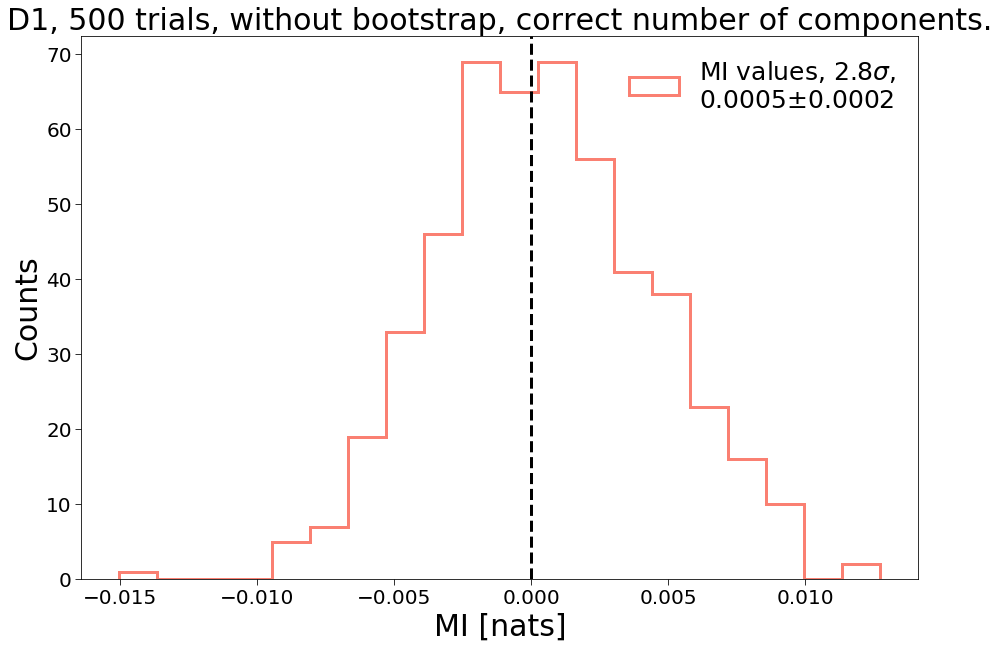

In [25]:
histogram_estimates(all_MI_estimates - analytic, title=f'{label}, {random_states} trials, without bootstrap, correct number of components.')

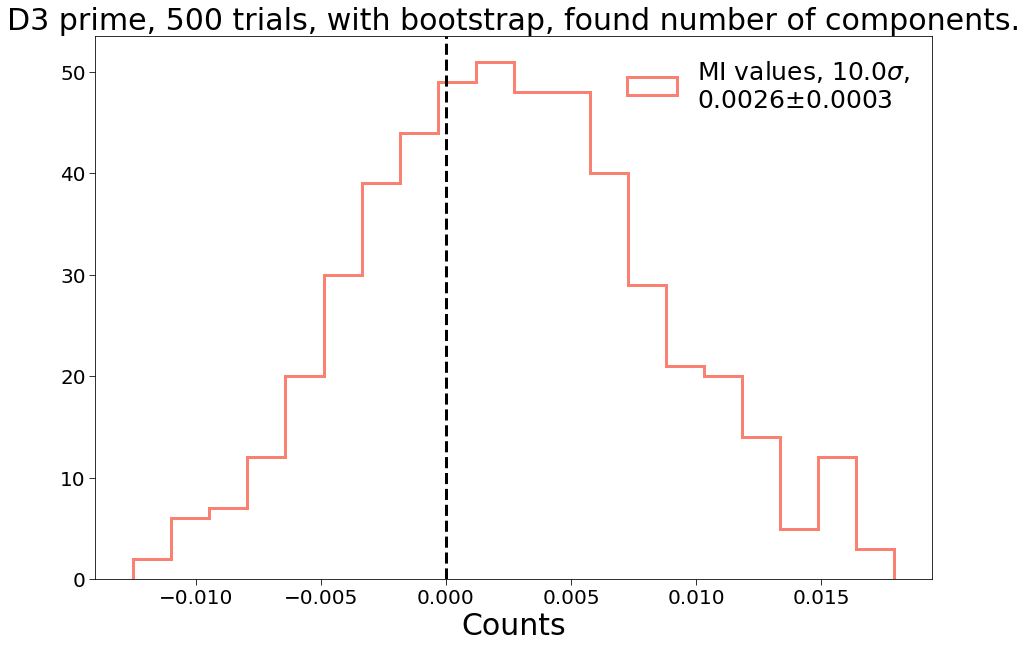

In [5]:
plot_MI_values(all_MI_estimates - analytic, title=f'D3 prime, {random_states} trials, with bootstrap, found number of components.')